# Simulator Client

This version uses the end-to-end simulator library rather than doing work itself.

In [1]:
import cupy as cp
import viz_cuda
import simulation
from pyinstrument import Profiler
from pyinstrument.renderers import ConsoleRenderer

profiler = Profiler()

mempool = cp.get_default_memory_pool()
mempool.free_all_blocks()
print(f"mempool.used_bytes {mempool.used_bytes()}")

results = simulation.SimulationResult()
simulator = simulation.Simulator(results, waves = 10, bundles = 20000000, bundle_size = 1)

mempool.used_bytes 0


/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [2]:
profiler.reset()
profiler.start()

#simulator.run()
simulator.run_all_waves()

session = profiler.stop()
profile_renderer = ConsoleRenderer(unicode=True, color=True, show_all=True)
print(profile_renderer.render(session))

duration 0.0 60049527
duration 0.5 84817
duration 1.0 210229175
photon batch energy joules: 7.158e-05
photon batch power watts: 7.158e-02
emitter area m^2: 1.000e-06
batch radiosity w/m^2: 7.158e+04
duration 1.2 110802724
duration 1.5 231728996
duration 2.0 85841766
duration 3.0 56012121
duration 3.2 39768832
duration 3.5 57085522
duration 4.0 37843709
duration 4.5 74200566
duration 5.0 21453495
duration 5.5 77907290
duration 6.0 35883544
duration 7.0 143415662
duration 0.0 6266
duration 0.5 27649
duration 1.0 30599476
photon batch energy joules: 7.158e-05
photon batch power watts: 7.158e-02
emitter area m^2: 1.000e-06
batch radiosity w/m^2: 7.158e+04
duration 1.2 95717019
duration 1.5 55104530
duration 2.0 86759220
duration 3.0 52851575
duration 3.2 30212891
duration 3.5 52988017
duration 4.0 33932678
duration 4.5 73675129
duration 5.0 21391750
duration 5.5 71404436
duration 6.0 33978702
duration 7.0 139781762
duration 0.0 9064
duration 0.5 105380
duration 1.0 31040971
photon batch en

LED emitted photons: 200000000


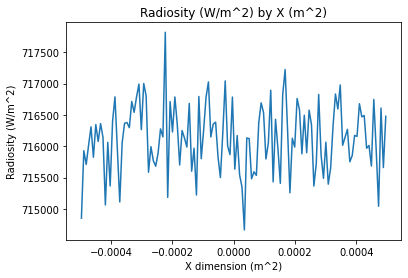

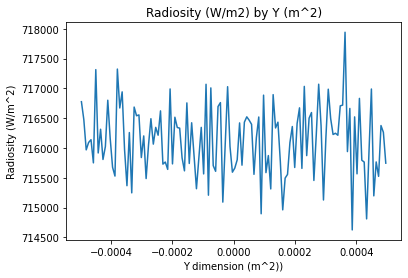

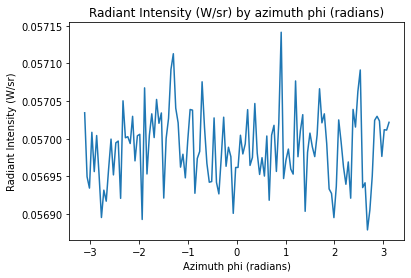

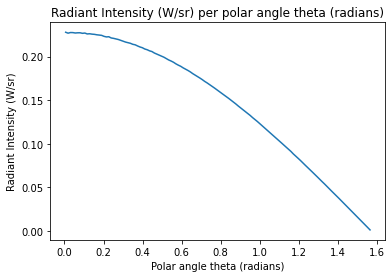

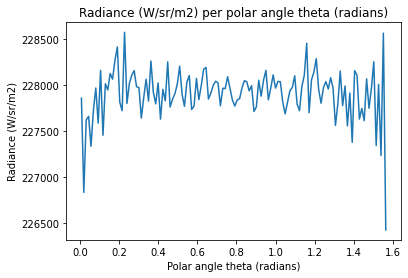

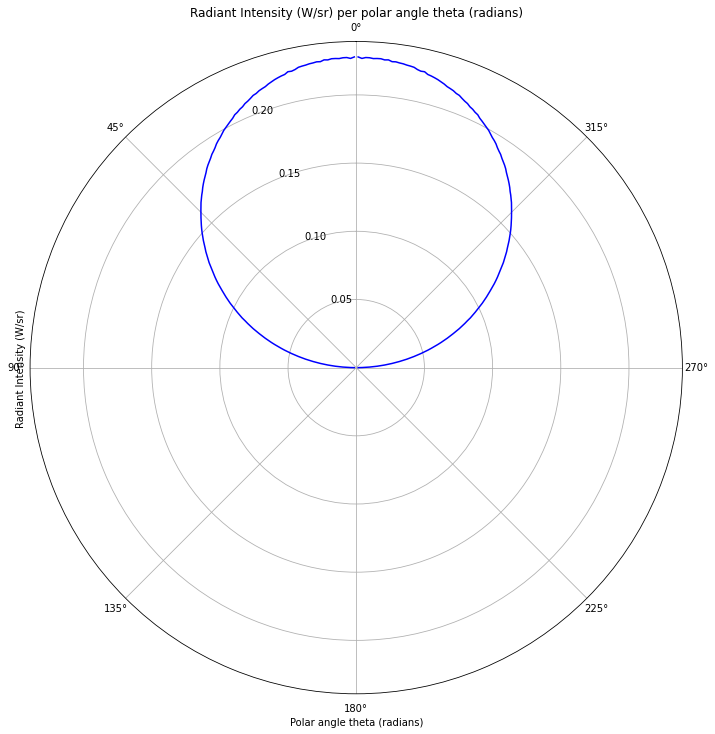

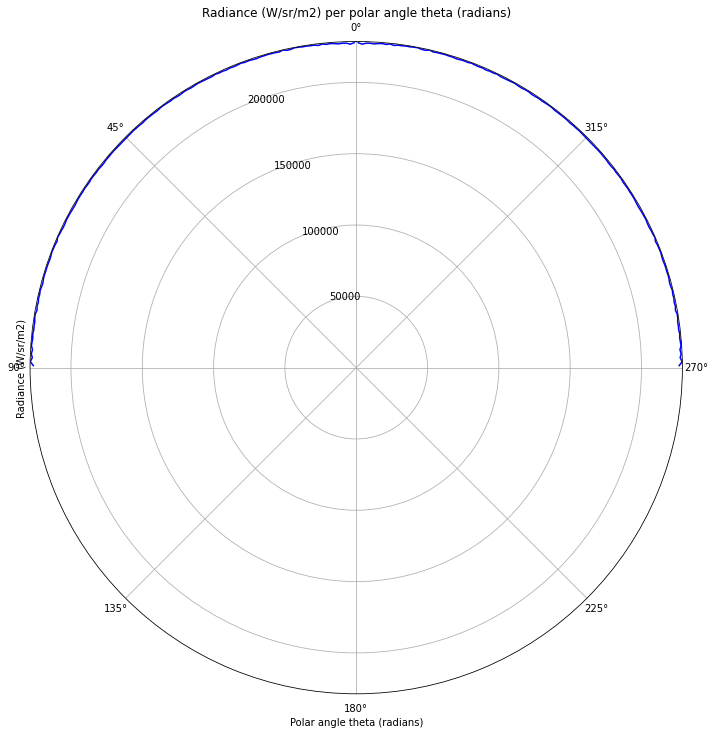

Output()

In [3]:
print(f"LED emitted photons: {results._source_stage._photons_size}")
viz_cuda.plot_all_histograms(results._source_stage)
viz_cuda.plot_stage_3d(results._source_stage)

diffuser incident photons: 168988524


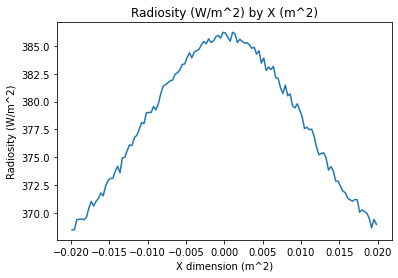

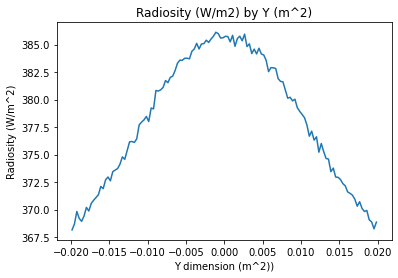

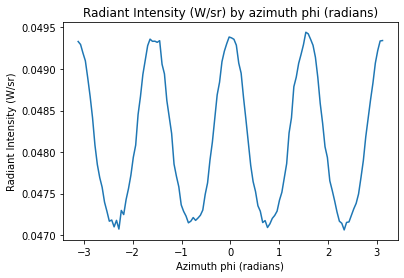

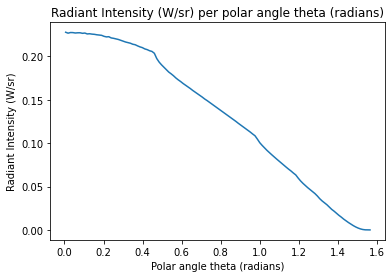

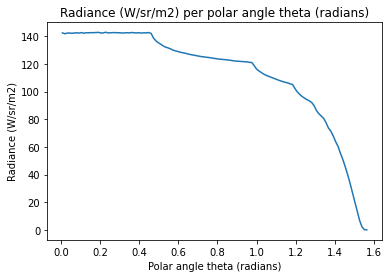

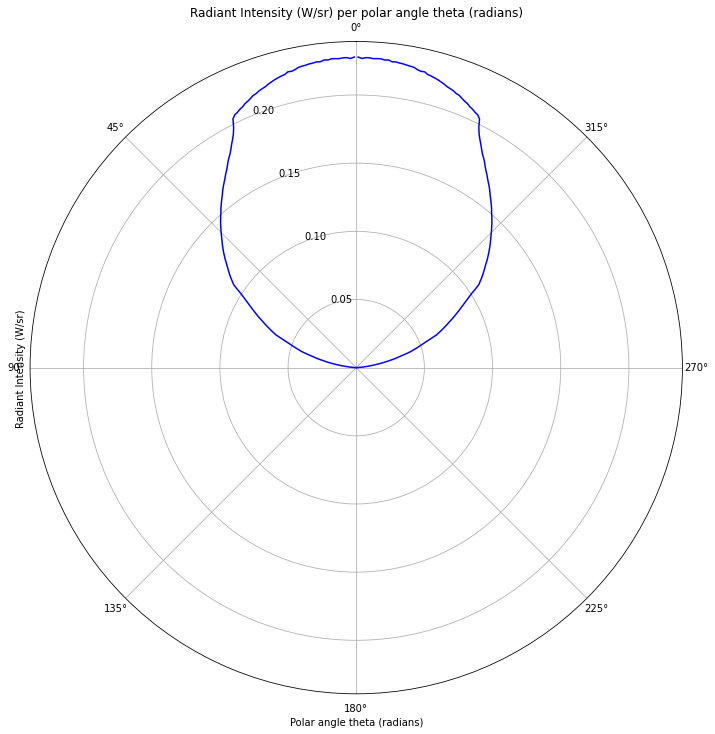

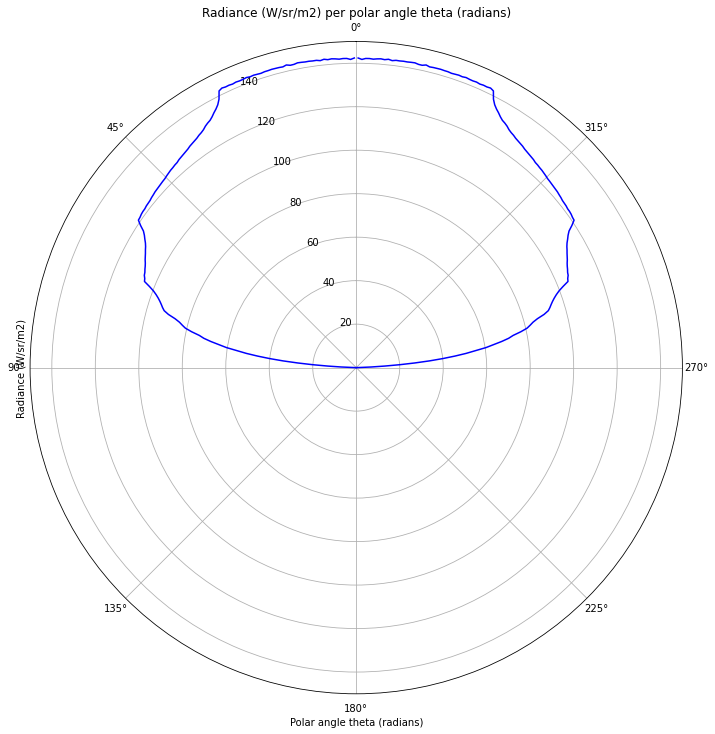

Output()

In [4]:
print(f"diffuser incident photons: {results._box_stage._photons_size}")
viz_cuda.plot_all_histograms(results._box_stage)
viz_cuda.plot_stage_3d(results._box_stage)

diffuser scattered photons: 141942110


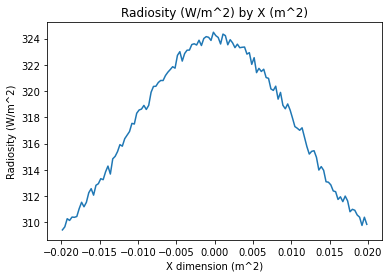

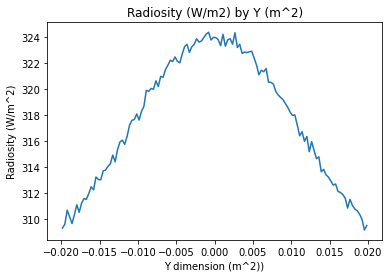

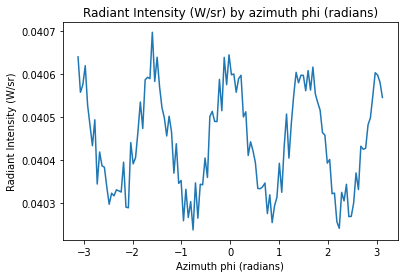

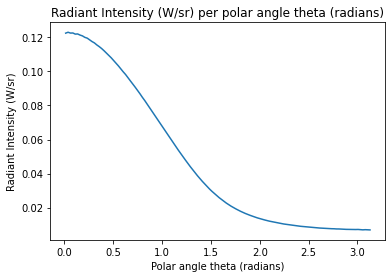

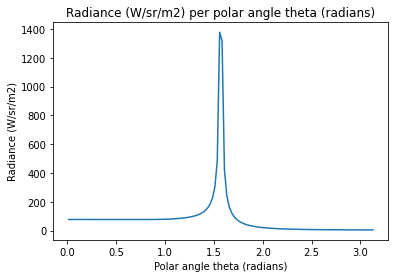

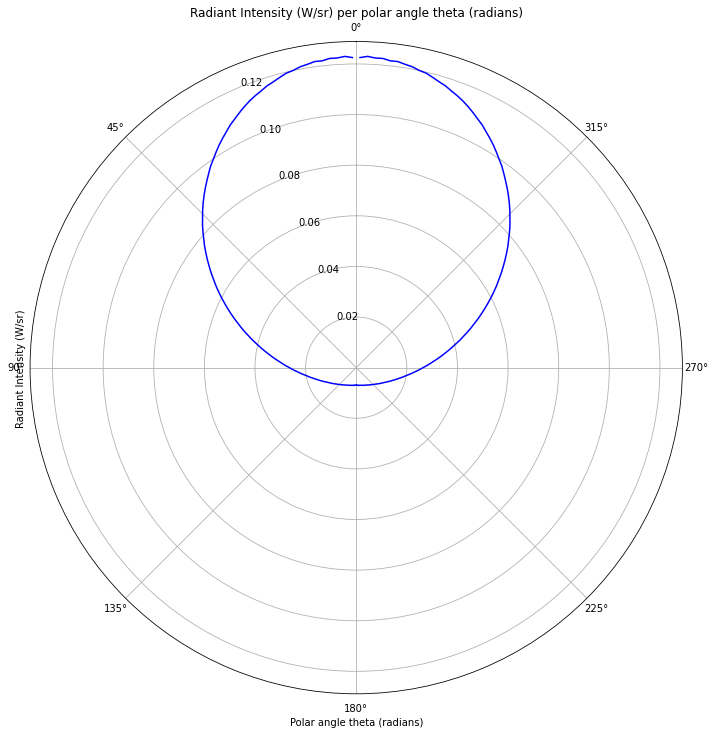

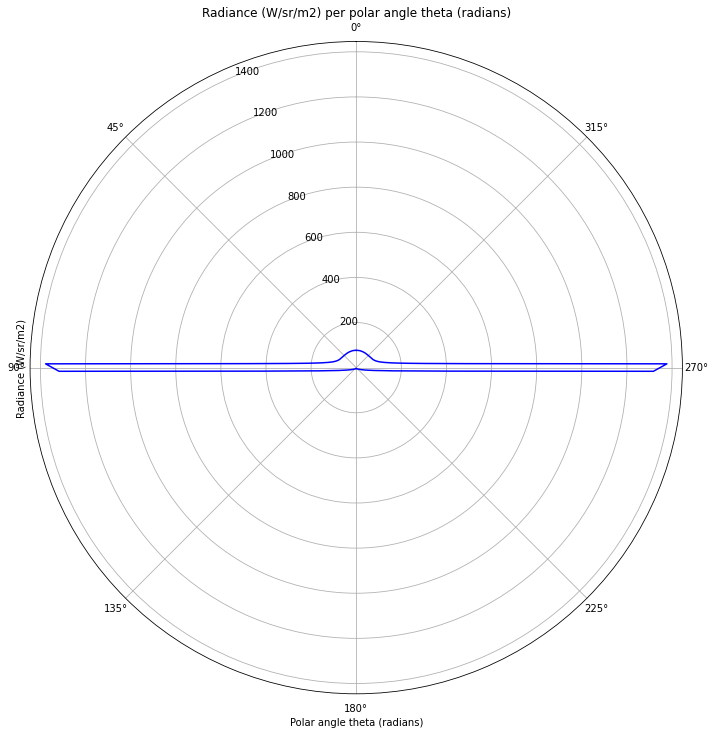

Output()

In [5]:
print(f"diffuser scattered photons: {results._diffuser_stage._photons_size}")
viz_cuda.plot_all_histograms(results._diffuser_stage)
viz_cuda.plot_stage_3d(results._diffuser_stage)

reflector indicent photons: 13858


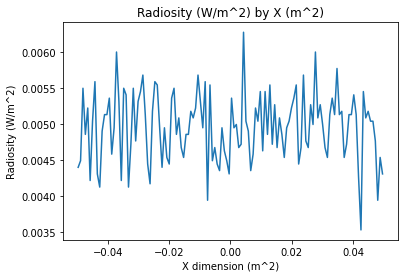

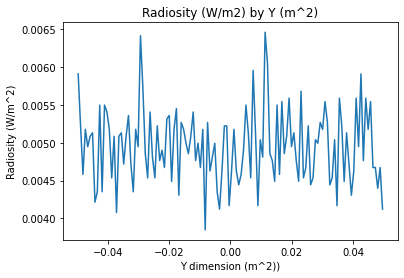

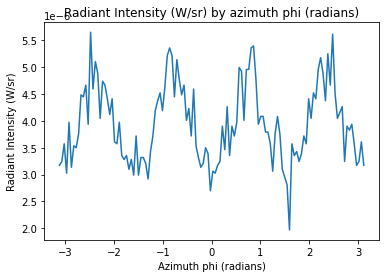

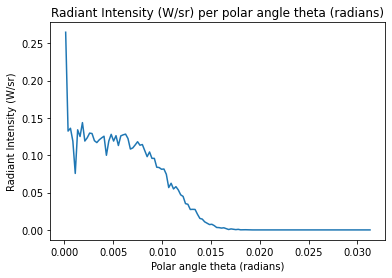

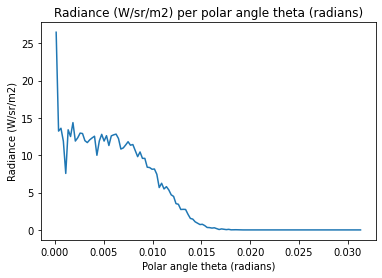

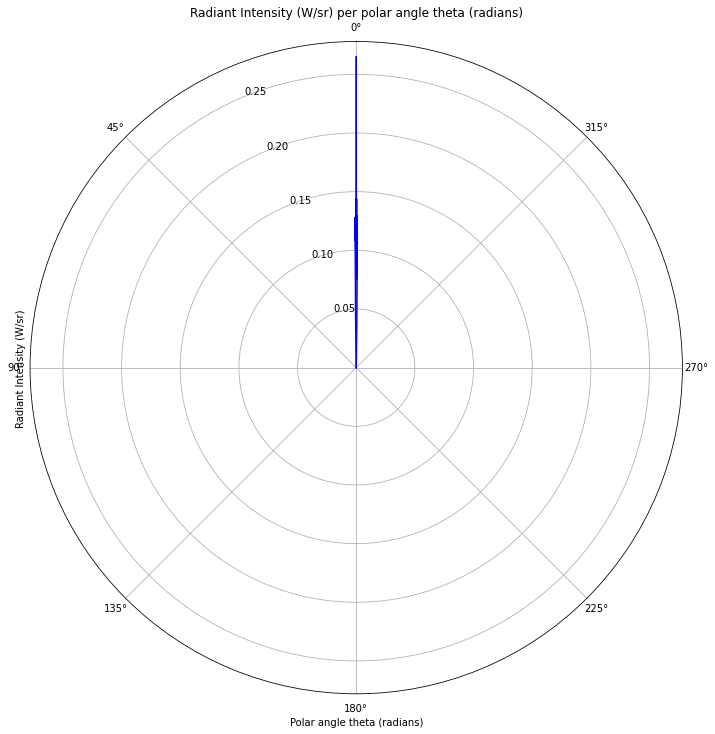

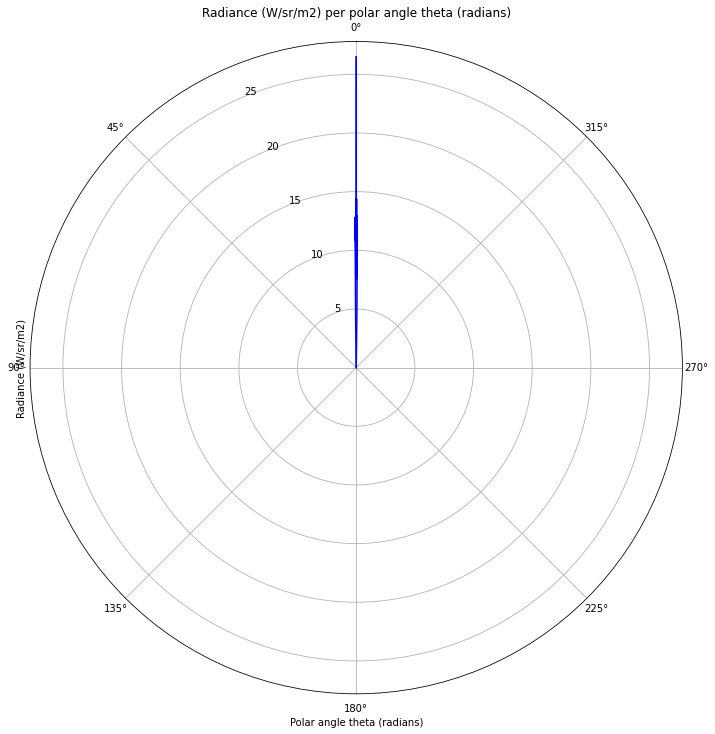

Output()

In [6]:
print(f"reflector indicent photons: {results._outbound_stage._photons_size}")
viz_cuda.plot_all_histograms(results._outbound_stage)
viz_cuda.plot_stage_3d(results._outbound_stage)

reflected photons: 13858


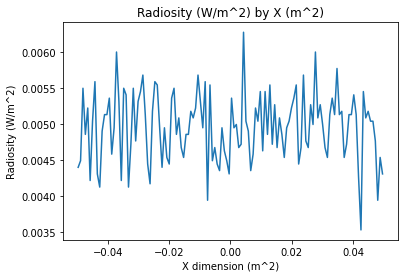

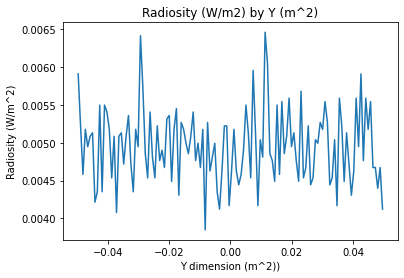

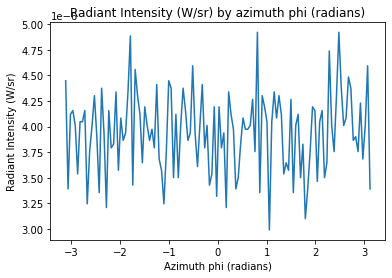

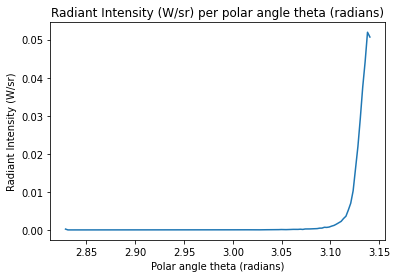

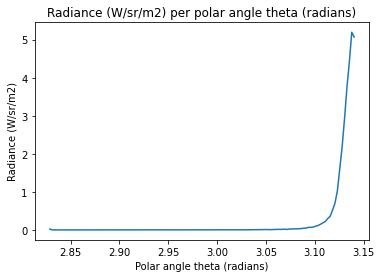

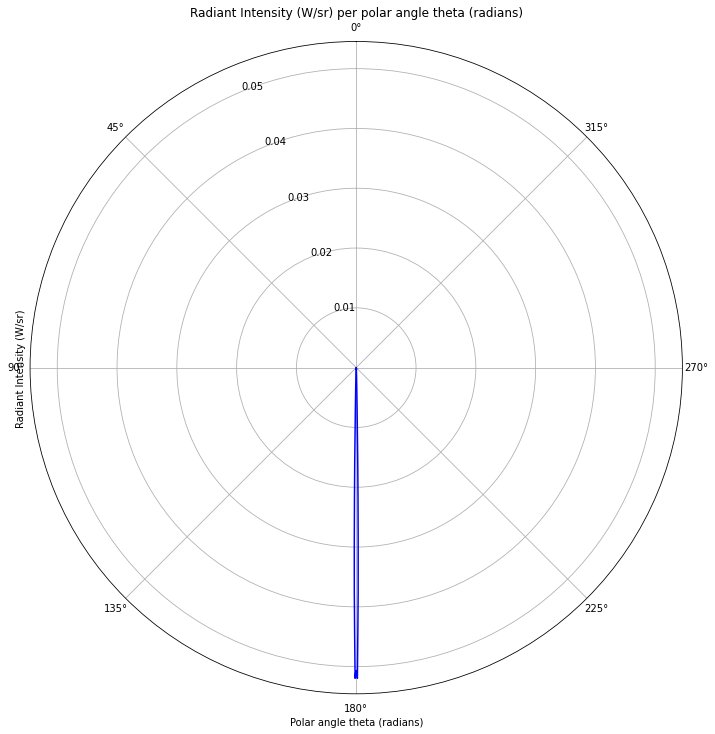

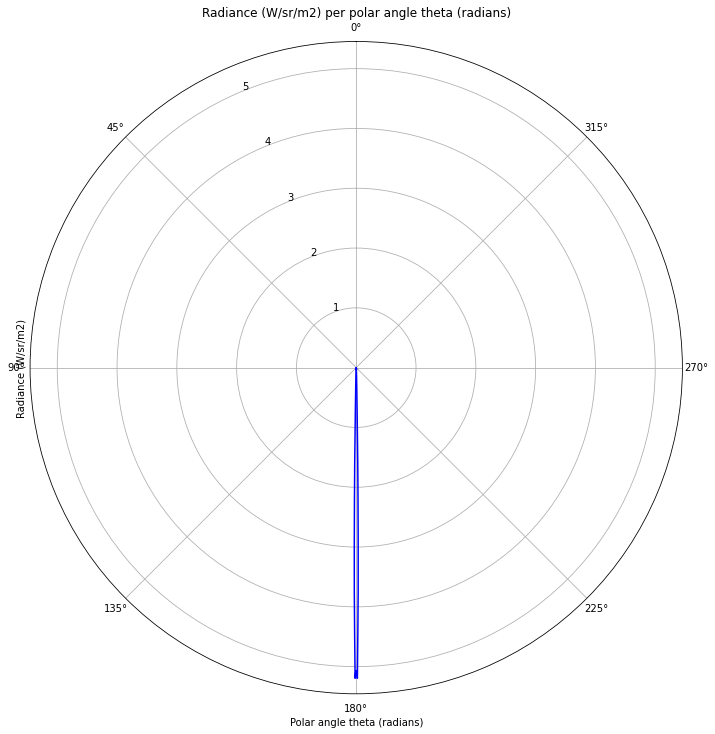

Output()

In [7]:
print(f"reflected photons: {results._inbound_stage._photons_size}")
viz_cuda.plot_all_histograms(results._inbound_stage)
viz_cuda.plot_stage_3d(results._inbound_stage)

camera plane photons: 9378


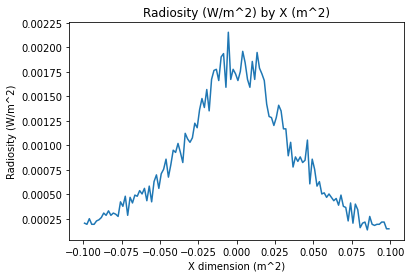

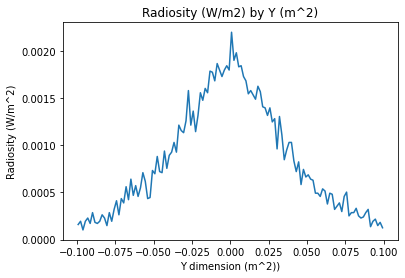

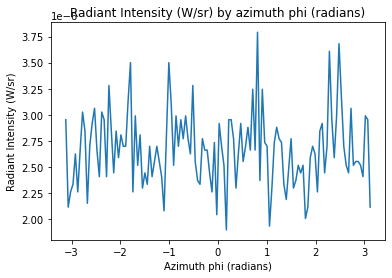

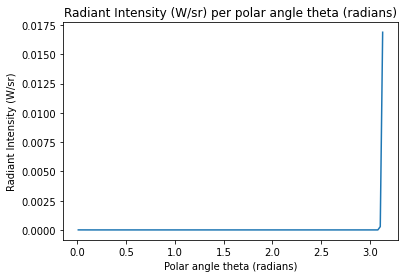

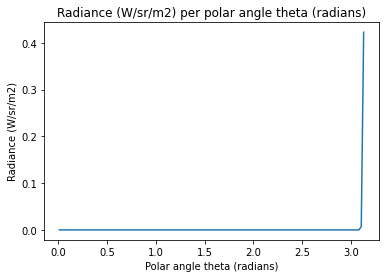

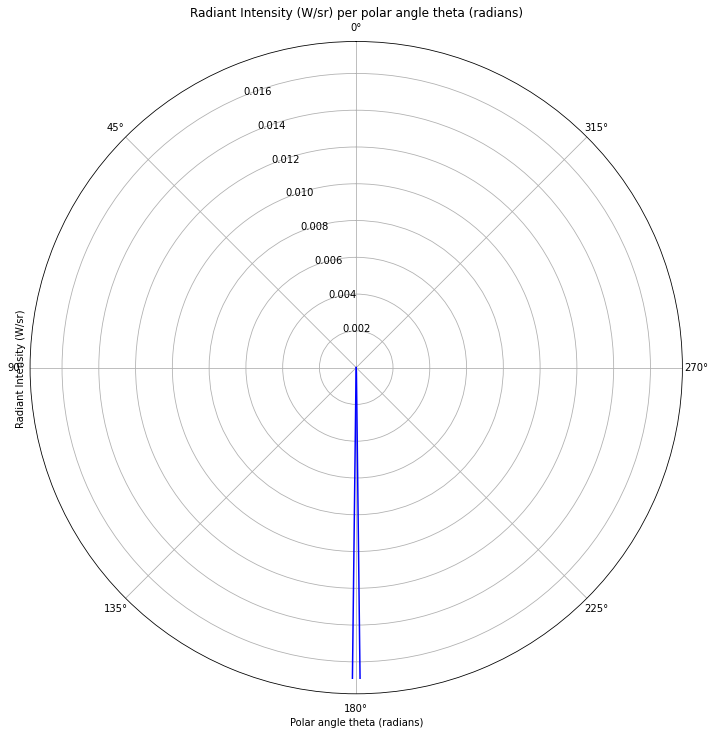

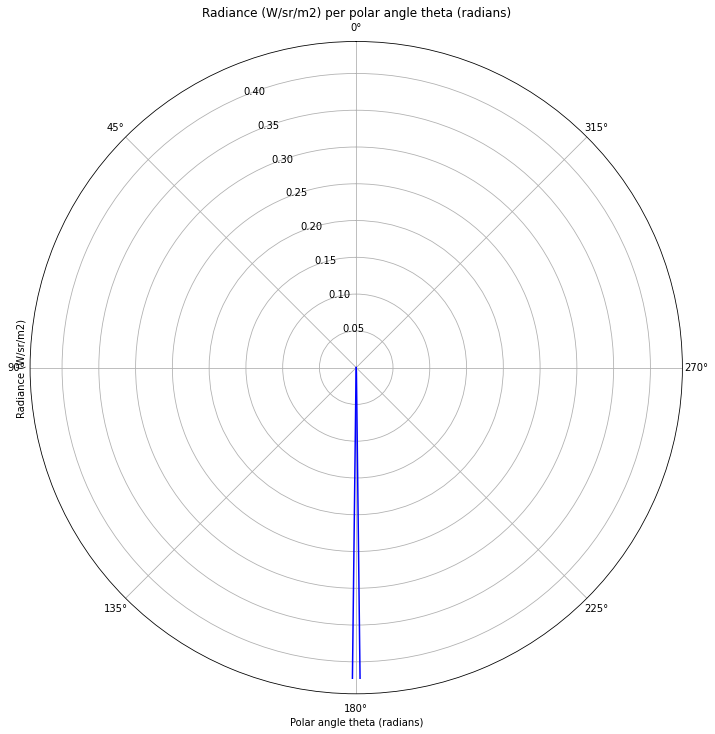

Output()

In [8]:
print(f"camera plane photons: {results._camera_plane_stage._photons_size}")
viz_cuda.plot_all_histograms(results._camera_plane_stage)
viz_cuda.plot_stage_3d(results._camera_plane_stage)